Name : Riyaz Hussain

Dept : M Tech Data Science

Course: Inferential Staatistics

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson

# **Titanic Survival**

In [ ]:
# Load the Titanic dataset
df = pd.read_csv('gender_submission.csv')

In [ ]:
df.shape

(418, 2)

In [ ]:
df.nunique()

PassengerId    418
Survived         2
dtype: int64

In [ ]:
df.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [ ]:
sur=df['Survived'].sum()

In [ ]:
# Calculate n, p, and mean
n = len(df)
p = df['Survived'].mean()
mean = n * p

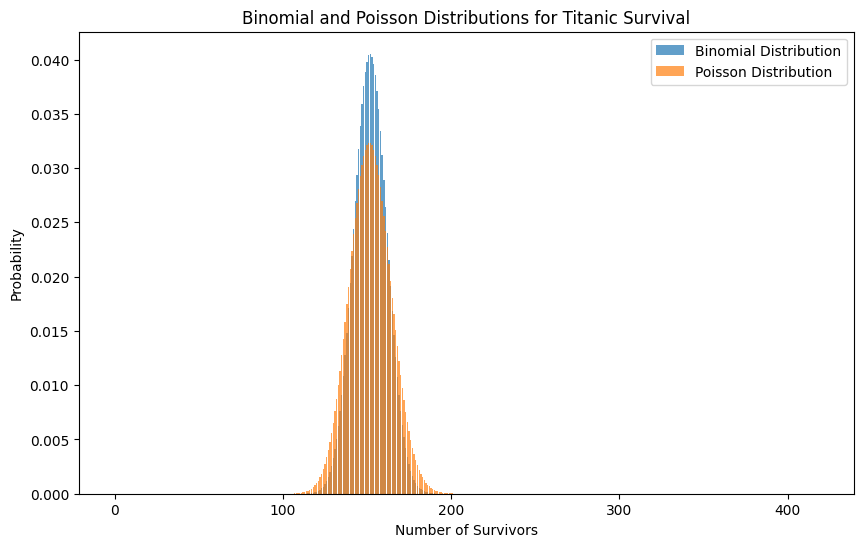

In [ ]:
# Binomial Distribution
x_binomial = np.arange(0, n+1) #k
pmf_binomial = binom.pmf(x_binomial, n, p)

# Poisson Distribution
x_poisson = np.arange(0, max(x_binomial) + 1)
pmf_poisson = poisson.pmf(x_poisson, mean)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x_binomial, pmf_binomial, alpha=0.7, label='Binomial Distribution')
plt.bar(x_poisson, pmf_poisson, alpha=0.7, label='Poisson Distribution')
plt.xlabel('Number of Survivors')
plt.ylabel('Probability')
plt.title('Binomial and Poisson Distributions for Titanic Survival')
plt.legend()
plt.show()

Calculates the probability mass function of the binomial distribution for each value in (x_binomial).

n => the number of trials.

p => the probability of success on each trial.

binom.pmf() => returns the probability of getting exactly x successes in n trials.

In [ ]:
print("Binomial Distribution:")
print(f"n = {n}")
print(f"p = {p}")
print(f"Mean = {mean}")

print("\nPoisson Distribution:")
print(f"λ = {mean}")

Binomial Distribution:
n = 418
p = 0.36363636363636365
Mean = 152.0

Poisson Distribution:
λ = 152.0


In [ ]:
print("binomial")
print(pmf_binomial)
print("poisson")
print(pmf_poisson)


binomial
[8.88870166e-083 2.12312988e-080 2.52955760e-078 2.00437326e-076
 1.18830701e-074 5.62238972e-073 2.21147329e-071 7.43777139e-070
 2.18351717e-068 5.68407645e-067 1.32844987e-065 2.81562361e-064
 5.45694672e-063 9.73855107e-062 1.60984211e-060 2.47762367e-059
 3.56600836e-058 4.81860625e-057 6.13416225e-056 7.37944330e-055
 8.41256537e-054 9.11075106e-053 9.39472253e-052 9.24300651e-051
 8.69282755e-050 7.82851213e-049 6.76176981e-048 5.60976459e-047
 4.47636317e-046 3.43996382e-045 2.54884938e-044 1.82295587e-043
 1.25979272e-042 8.42043271e-042 5.44851528e-041 3.41588550e-040
 2.07664150e-039 1.22513831e-038 7.01921346e-038 3.90813350e-037
 2.11597514e-036 1.11475763e-035 5.71787249e-035 2.85703662e-034
 1.39141394e-033 6.60811191e-033 3.06189533e-032 1.38483290e-031
 6.11634532e-031 2.63912276e-030 1.11295577e-029 4.58899410e-029
 1.85072619e-028 7.30313517e-028 2.82078766e-027 1.06677060e-026
 3.95140540e-026 1.43399374e-025 5.10021419e-025 1.77828291e-024
 6.08003396e-024

In [ ]:
poi_fit=round(sur*sum(pmf_poisson),0)
bin_fit=round(sur*sum(pmf_binomial),0)

In [ ]:
if(poi_fit==sur):
  print("poisson is better fit")
if(bin_fit==sur):
  print("binomial is better fit")

poisson is better fit
binomial is better fit


# **EXAMPLE PROBLEM IN BOOK**

In [ ]:
df_1=pd.read_csv('Binomial_poisson.csv')

In [ ]:
df_1

x   f
0  0   5
1  1  18
2  2  28
3  3  12
4  4   7
5  5   6
6  6   4

In [ ]:
n = df_1['x'].iloc[-1]
print('n:',n)

n: 6


In [ ]:
# Calculate Σ(fx)
fx = [x_i * f_i for x_i, f_i in zip(df_1['x'], df_1['f'])]
sum_fx = sum(fx)

# Calculate Σf
sum_f = df_1['f'].sum()

# Calculate the arithmetic mean
arithmetic_mean = sum_fx / sum_f

print("Arithmetic Mean:", arithmetic_mean)
p=round(arithmetic_mean/n , 1)
print('p: ',p)
print('n:',n)

Arithmetic Mean: 2.4
p:  0.4
n: 6


In [ ]:
N=sum_f
k=[x for x in df_1['x']]
k

[0, 1, 2, 3, 4, 5, 6]

In [ ]:
from scipy.special import comb

In [ ]:
def Binomial_distribution(N,n,k,p):
  q=1-p
  Probability=[]
  for i in k:
    prob=N * comb(n,i) * (p**i) * (q**(n-i))
    Probability.append(prob)
  return Probability

N: Total number of trials (elements in data)

n: Number of successes in each trial (assumed to be the data points)

i: Number of successes for which we're calculating the probability

p: Probability of success (calculated as arithmetic mean divided by n)

q: 1 - p (probability of failure)

In [ ]:
result=Binomial_distribution(N,n,k,p)
print("binomial distribution: ",result)
print("sum of probabilities",round(sum(result),0))

binomial distribution:  [3.732479999999999, 14.929919999999996, 24.883200000000002, 22.1184, 11.059200000000002, 2.9491200000000006, 0.32768000000000014]
sum of probabilities 80.0


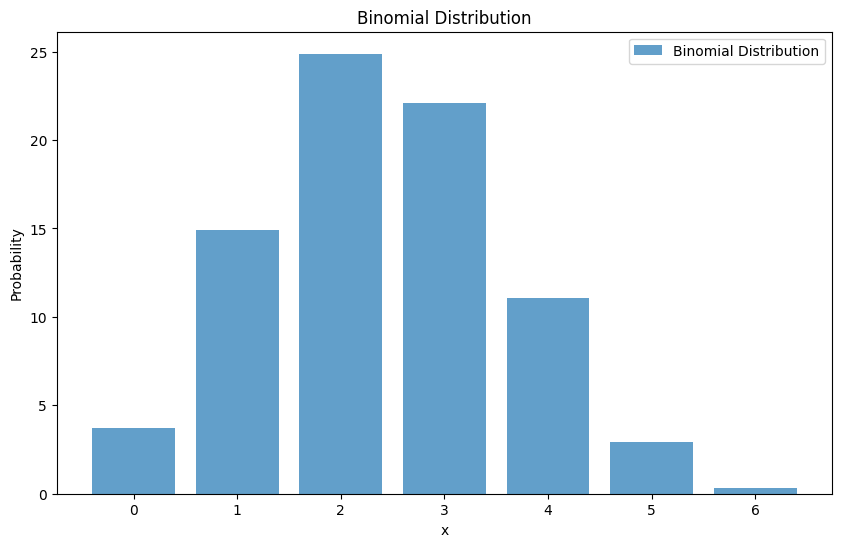

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(k, result, alpha=0.7, label='Binomial Distribution')
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Binomial Distribution')
plt.legend()
plt.show()

A binomial distribution models the probability of a specific number of successes (k) in a fixed number (n) of independent Bernoulli trials, each with a probability of success (p).

The standard binomial PMF is given by:

P(X = k) = C(n, k) * p^k * (1-p)^(n-k)
Where:

P(X = k): Probability of exactly k successes

C(n, k): Binomial coefficient (number of ways to choose k items from n items)

n: Number of trials

k: Number of successes

p: Probability of success on a single trial

q(1-p): Probability of failure on a single trial


The Scaled Version

In your formula, the additional N factor scales the probabilities. This can be useful in various contexts, such as:

Normalizing probabilities: Ensuring that the probabilities sum to a specific value (e.g., 1).

Weighting probabilities: Assigning different weights to different outcomes.

Adjusting for specific distributions: Modifying the probability distribution to fit a particular scenario.

Key Points:

The binomial distribution is a fundamental probability distribution used in various fields, including statistics, finance, and machine learning.

The scaling factor N provides flexibility in shaping the probability distribution.

Understanding the binomial PMF is essential for analyzing and modeling binary outcomes.

By understanding the binomial distribution and its scaled version, you can apply it to various real-world scenarios and make informed decisions based on probabilistic calculations.


In [ ]:
def Poisson_Distribution(arithmetic_mean,k):
  prob_poisson=[]
  for i in k:
    probability_poisson = N * (arithmetic_mean**i) * math.exp(-arithmetic_mean) / math.factorial(i)
    prob_poisson.append(probability_poisson)
  return prob_poisson

N: Total number of trials (elements in data)

arithmetic_mean: Mean of the data (assumed to be the rate of occurrence for Poisson distribution)

i: Number of successes for which we're calculating the probability

exp: math.exp function to calculate the exponential term

In [ ]:
import math

In [ ]:
result_p=Poisson_Distribution(arithmetic_mean,k)
print("Poisson distribution: ",result_p)
print("Arithmetic mean: ",arithmetic_mean)
print("sum of probabilities",round(sum(result_p),0))

Poisson distribution:  [7.257436263153001, 17.417847031567202, 20.90141643788064, 16.721133150304514, 10.032679890182708, 4.8156863472876985, 1.9262745389150795]
Arithmetic mean:  2.4
sum of probabilities 79.0


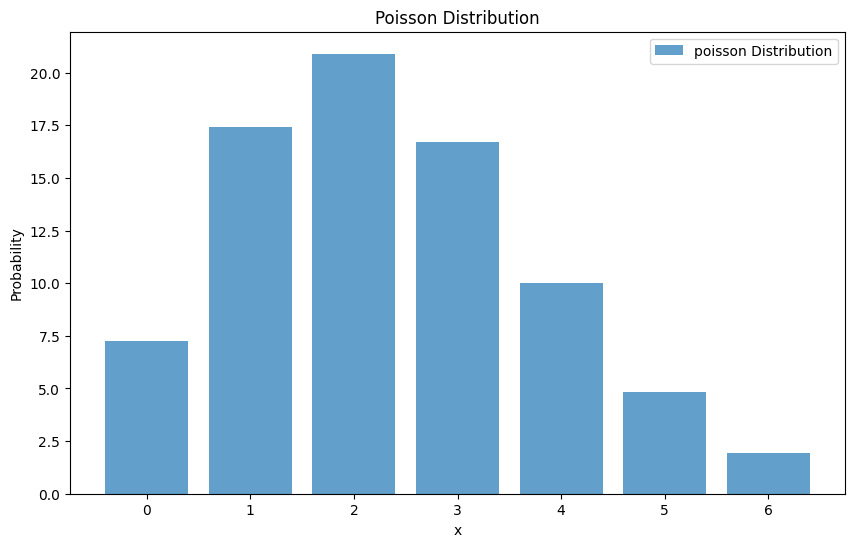

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(k, result_p, alpha=0.7, label='poisson Distribution')
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Poisson Distribution')
plt.legend()
plt.show()

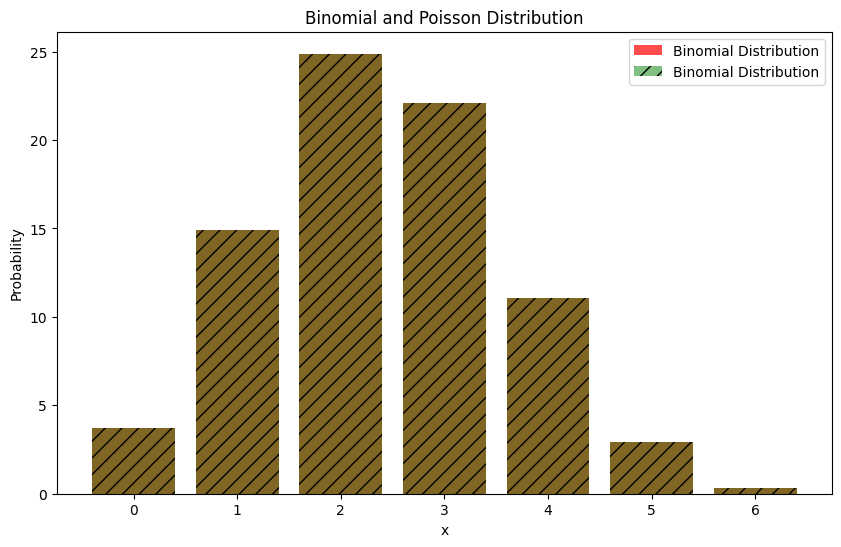

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(k, result, alpha=0.7,color='red', label='Binomial Distribution')
plt.bar(k, result, alpha=0.5,color='green',hatch='//',label='Binomial Distribution')
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Binomial and Poisson Distribution')
plt.legend()
plt.show()

In [ ]:
pmf_binomial = binom.pmf(k, n, p)
N*pmf_binomial

array([ 3.73248, 14.92992, 24.8832 , 22.1184 , 11.0592 ,  2.94912,
        0.32768])

In [ ]:
pmf_poisson = poisson.pmf(k, arithmetic_mean)
N*pmf_poisson

array([ 7.25743626, 17.41784703, 20.90141644, 16.72113315, 10.03267989,
        4.81568635,  1.92627454])

In [ ]:
poi_bfit=round(sum(N*pmf_poisson),0)

In [ ]:
bin_bfit=round(sum(N*pmf_binomial),0)

In [ ]:
if(poi_bfit==N):
  print("Poisson is better fit")
if(bin_bfit==N):
  print("binomial is better fit")

binomial is better fit


The above distribution is still not enough to assess the fit, so we need to Conduct statistical tests like the **chi-squared goodness-of-fit test** to formally assess the fit of the distributions to the data.

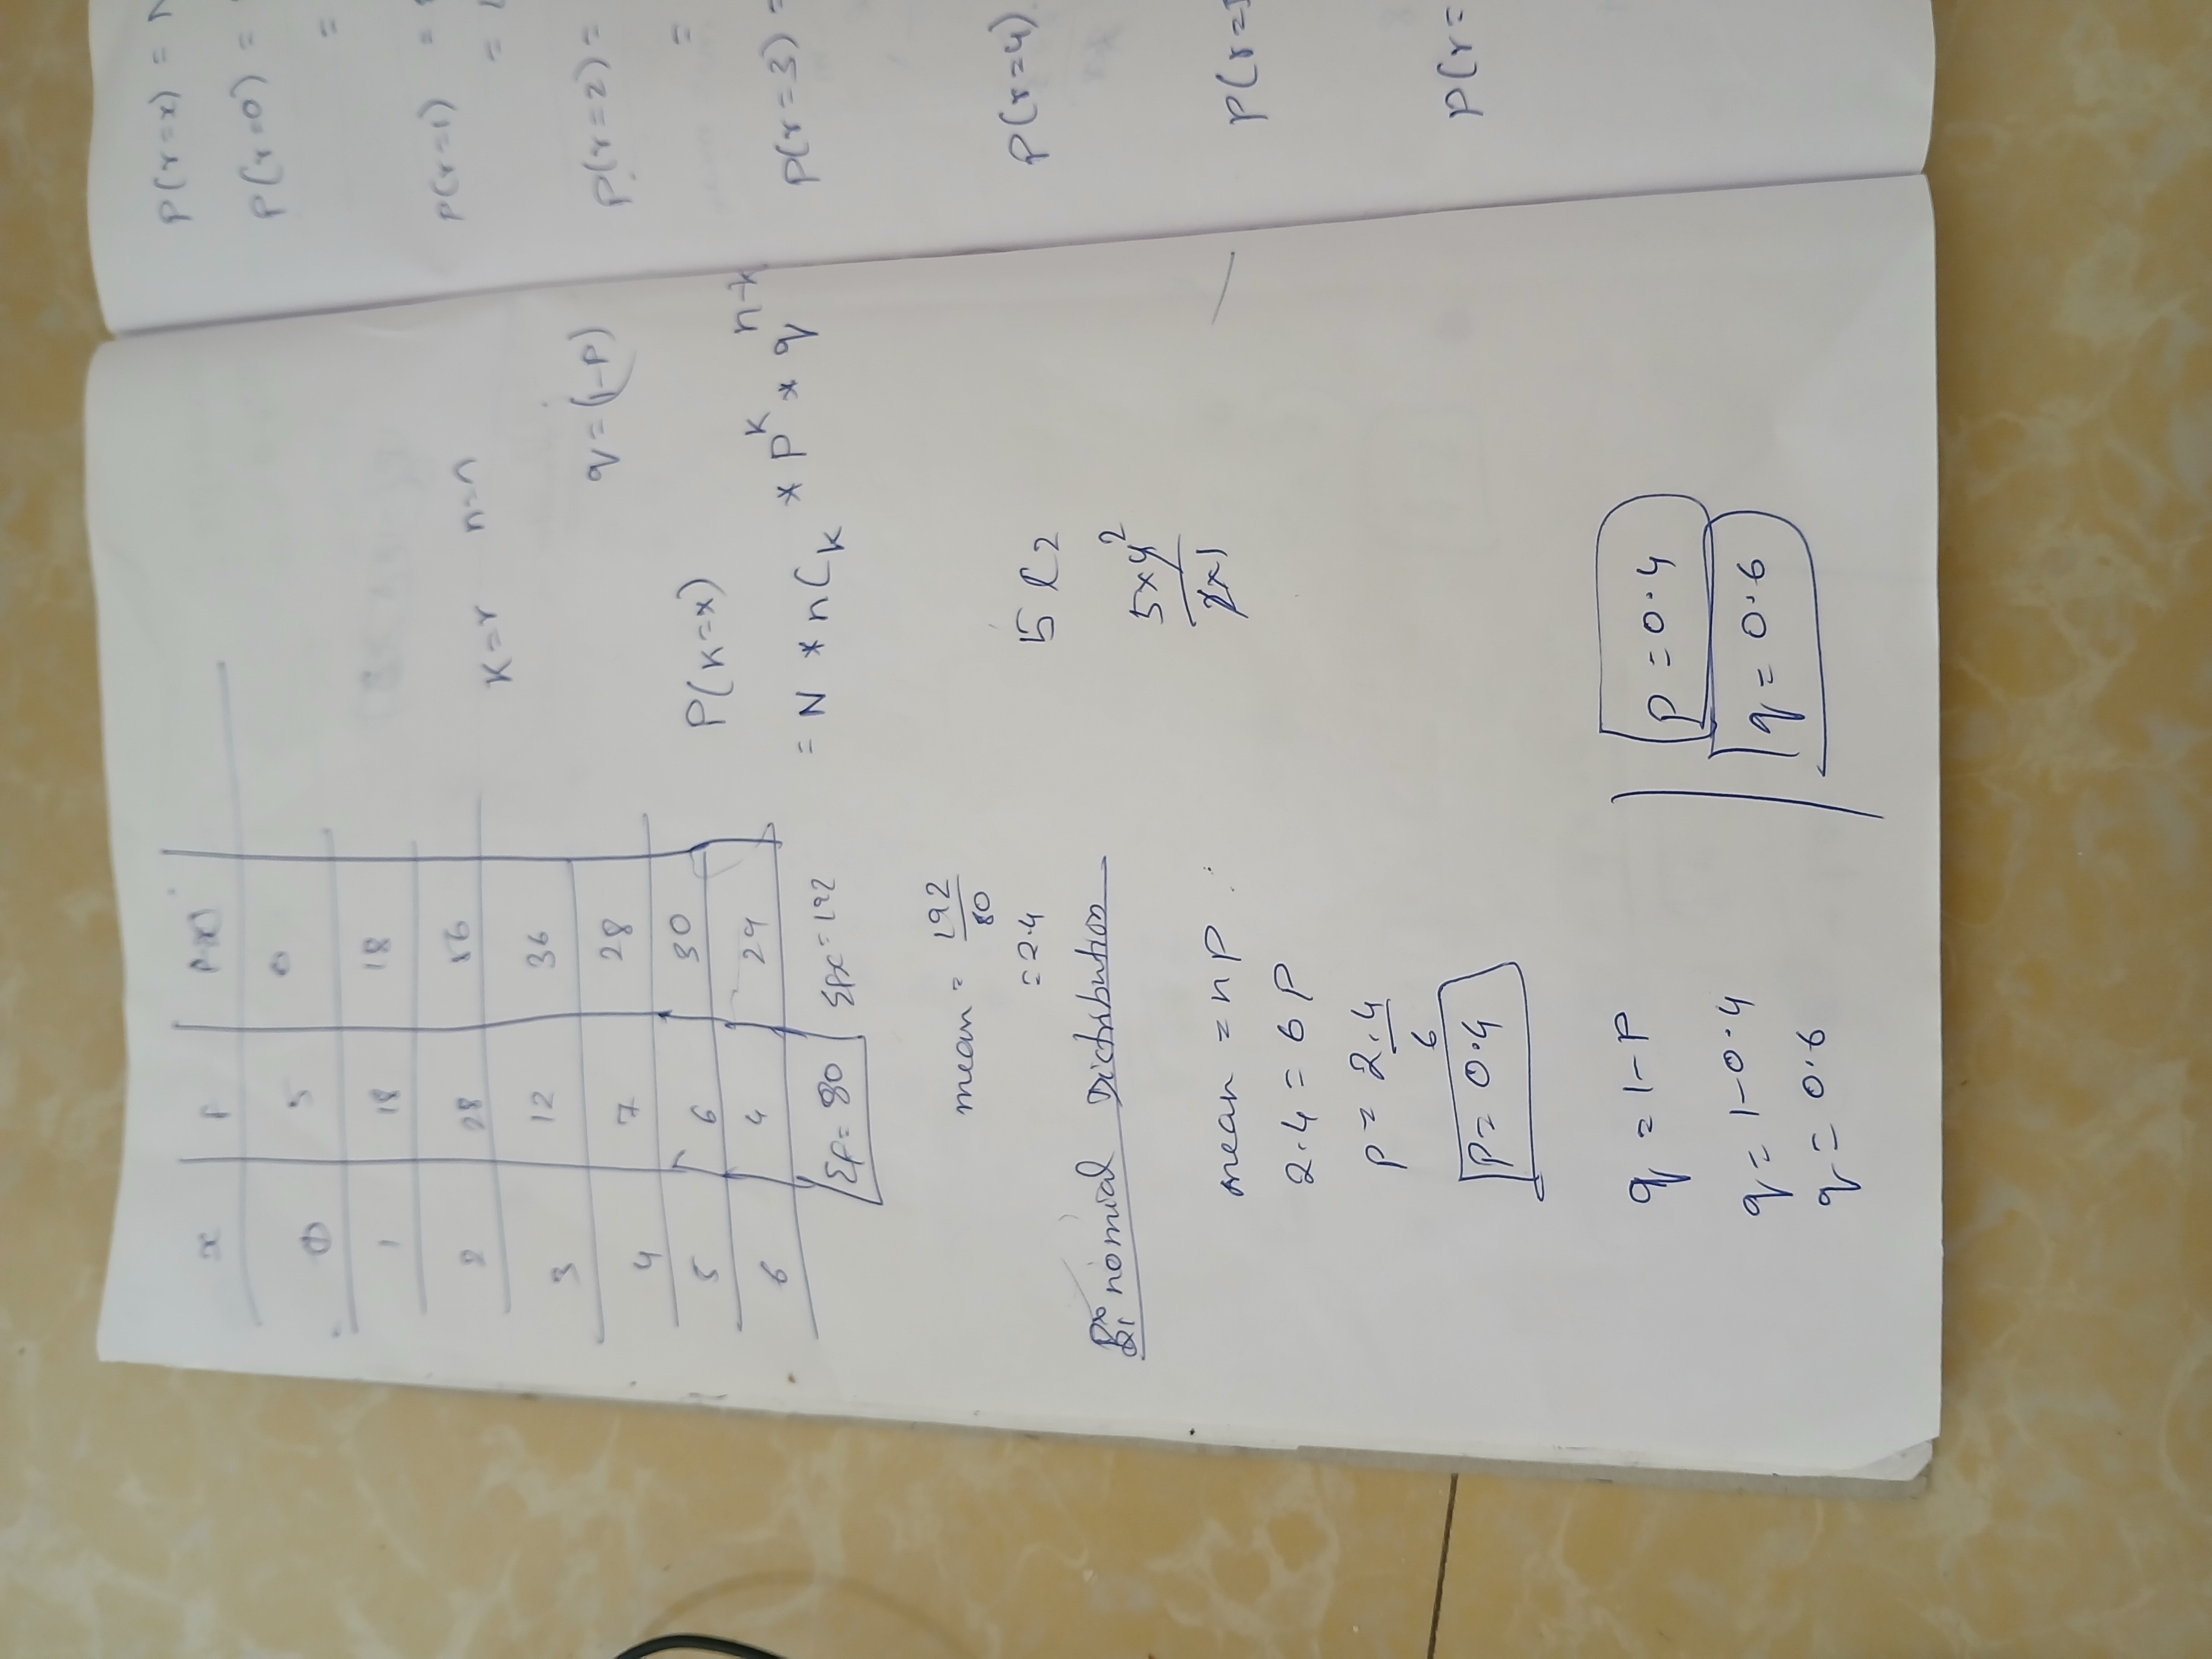

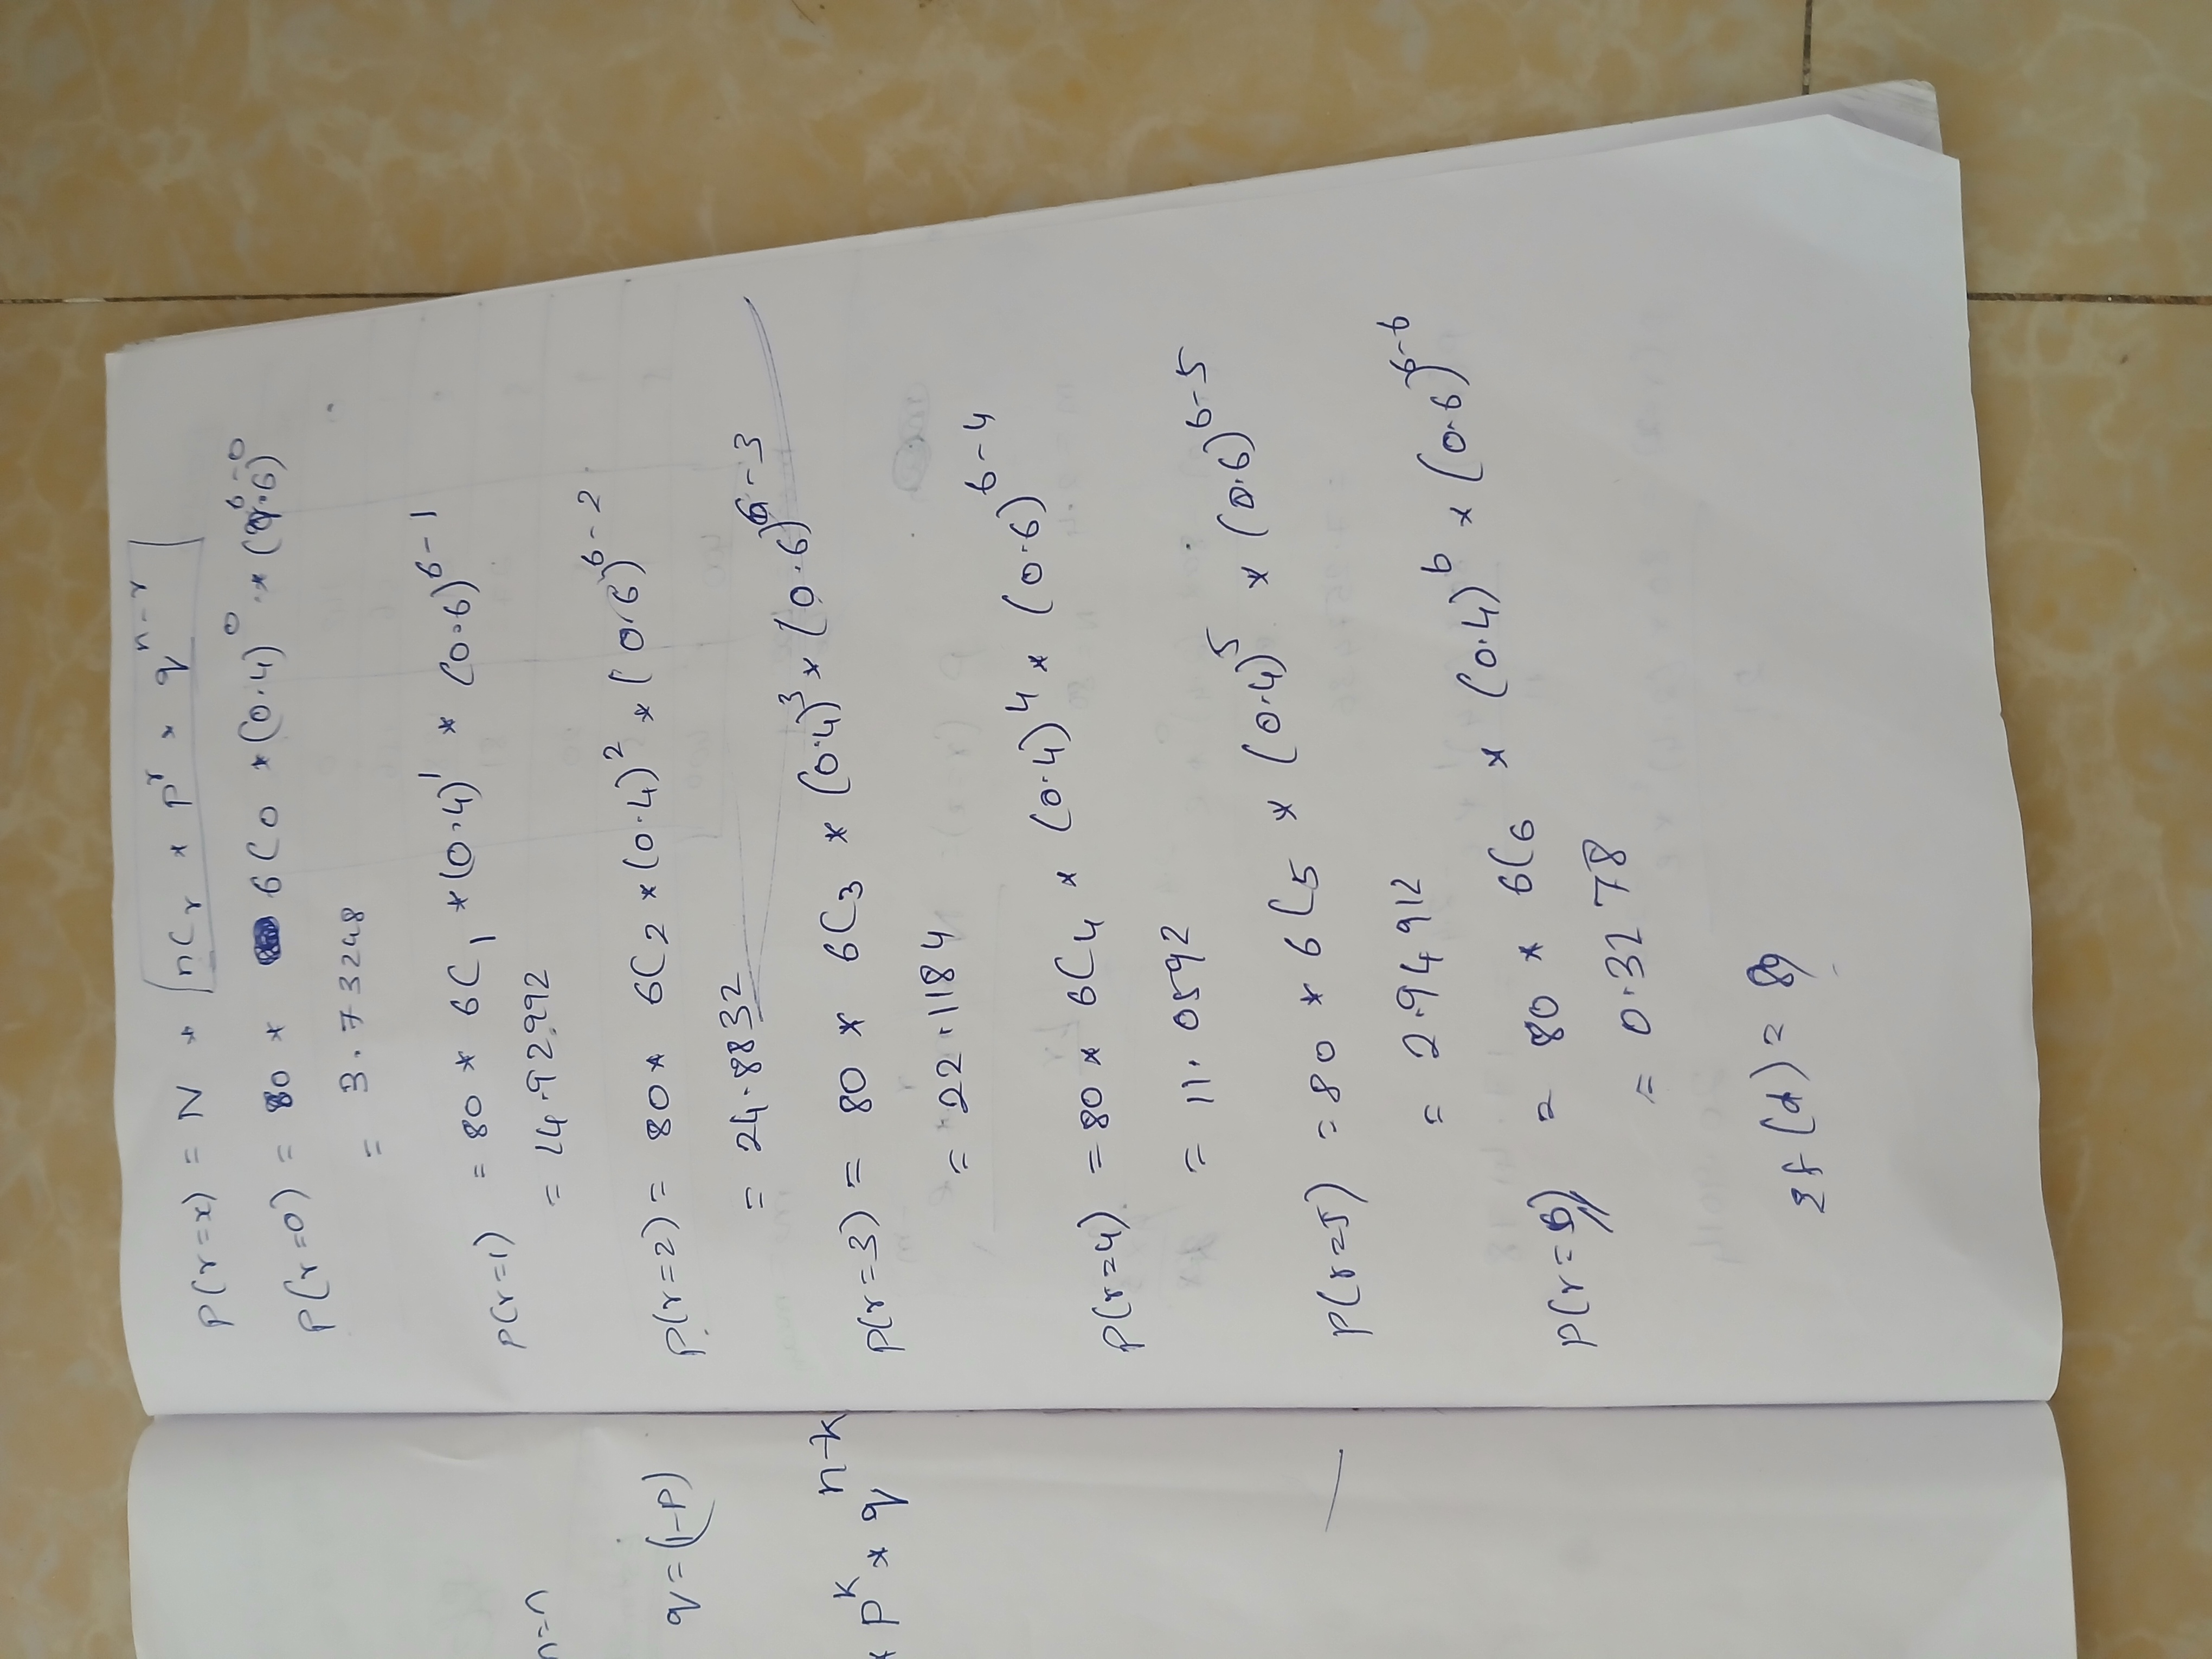

N: Total number of trials

n: Number of successes in each trial (assumed to be the data points)

r: Number of successes for which we're calculating the probability

p: Probability of success (calculated as arithmetic mean divided by n)

q: 1 - p (probability of failure)




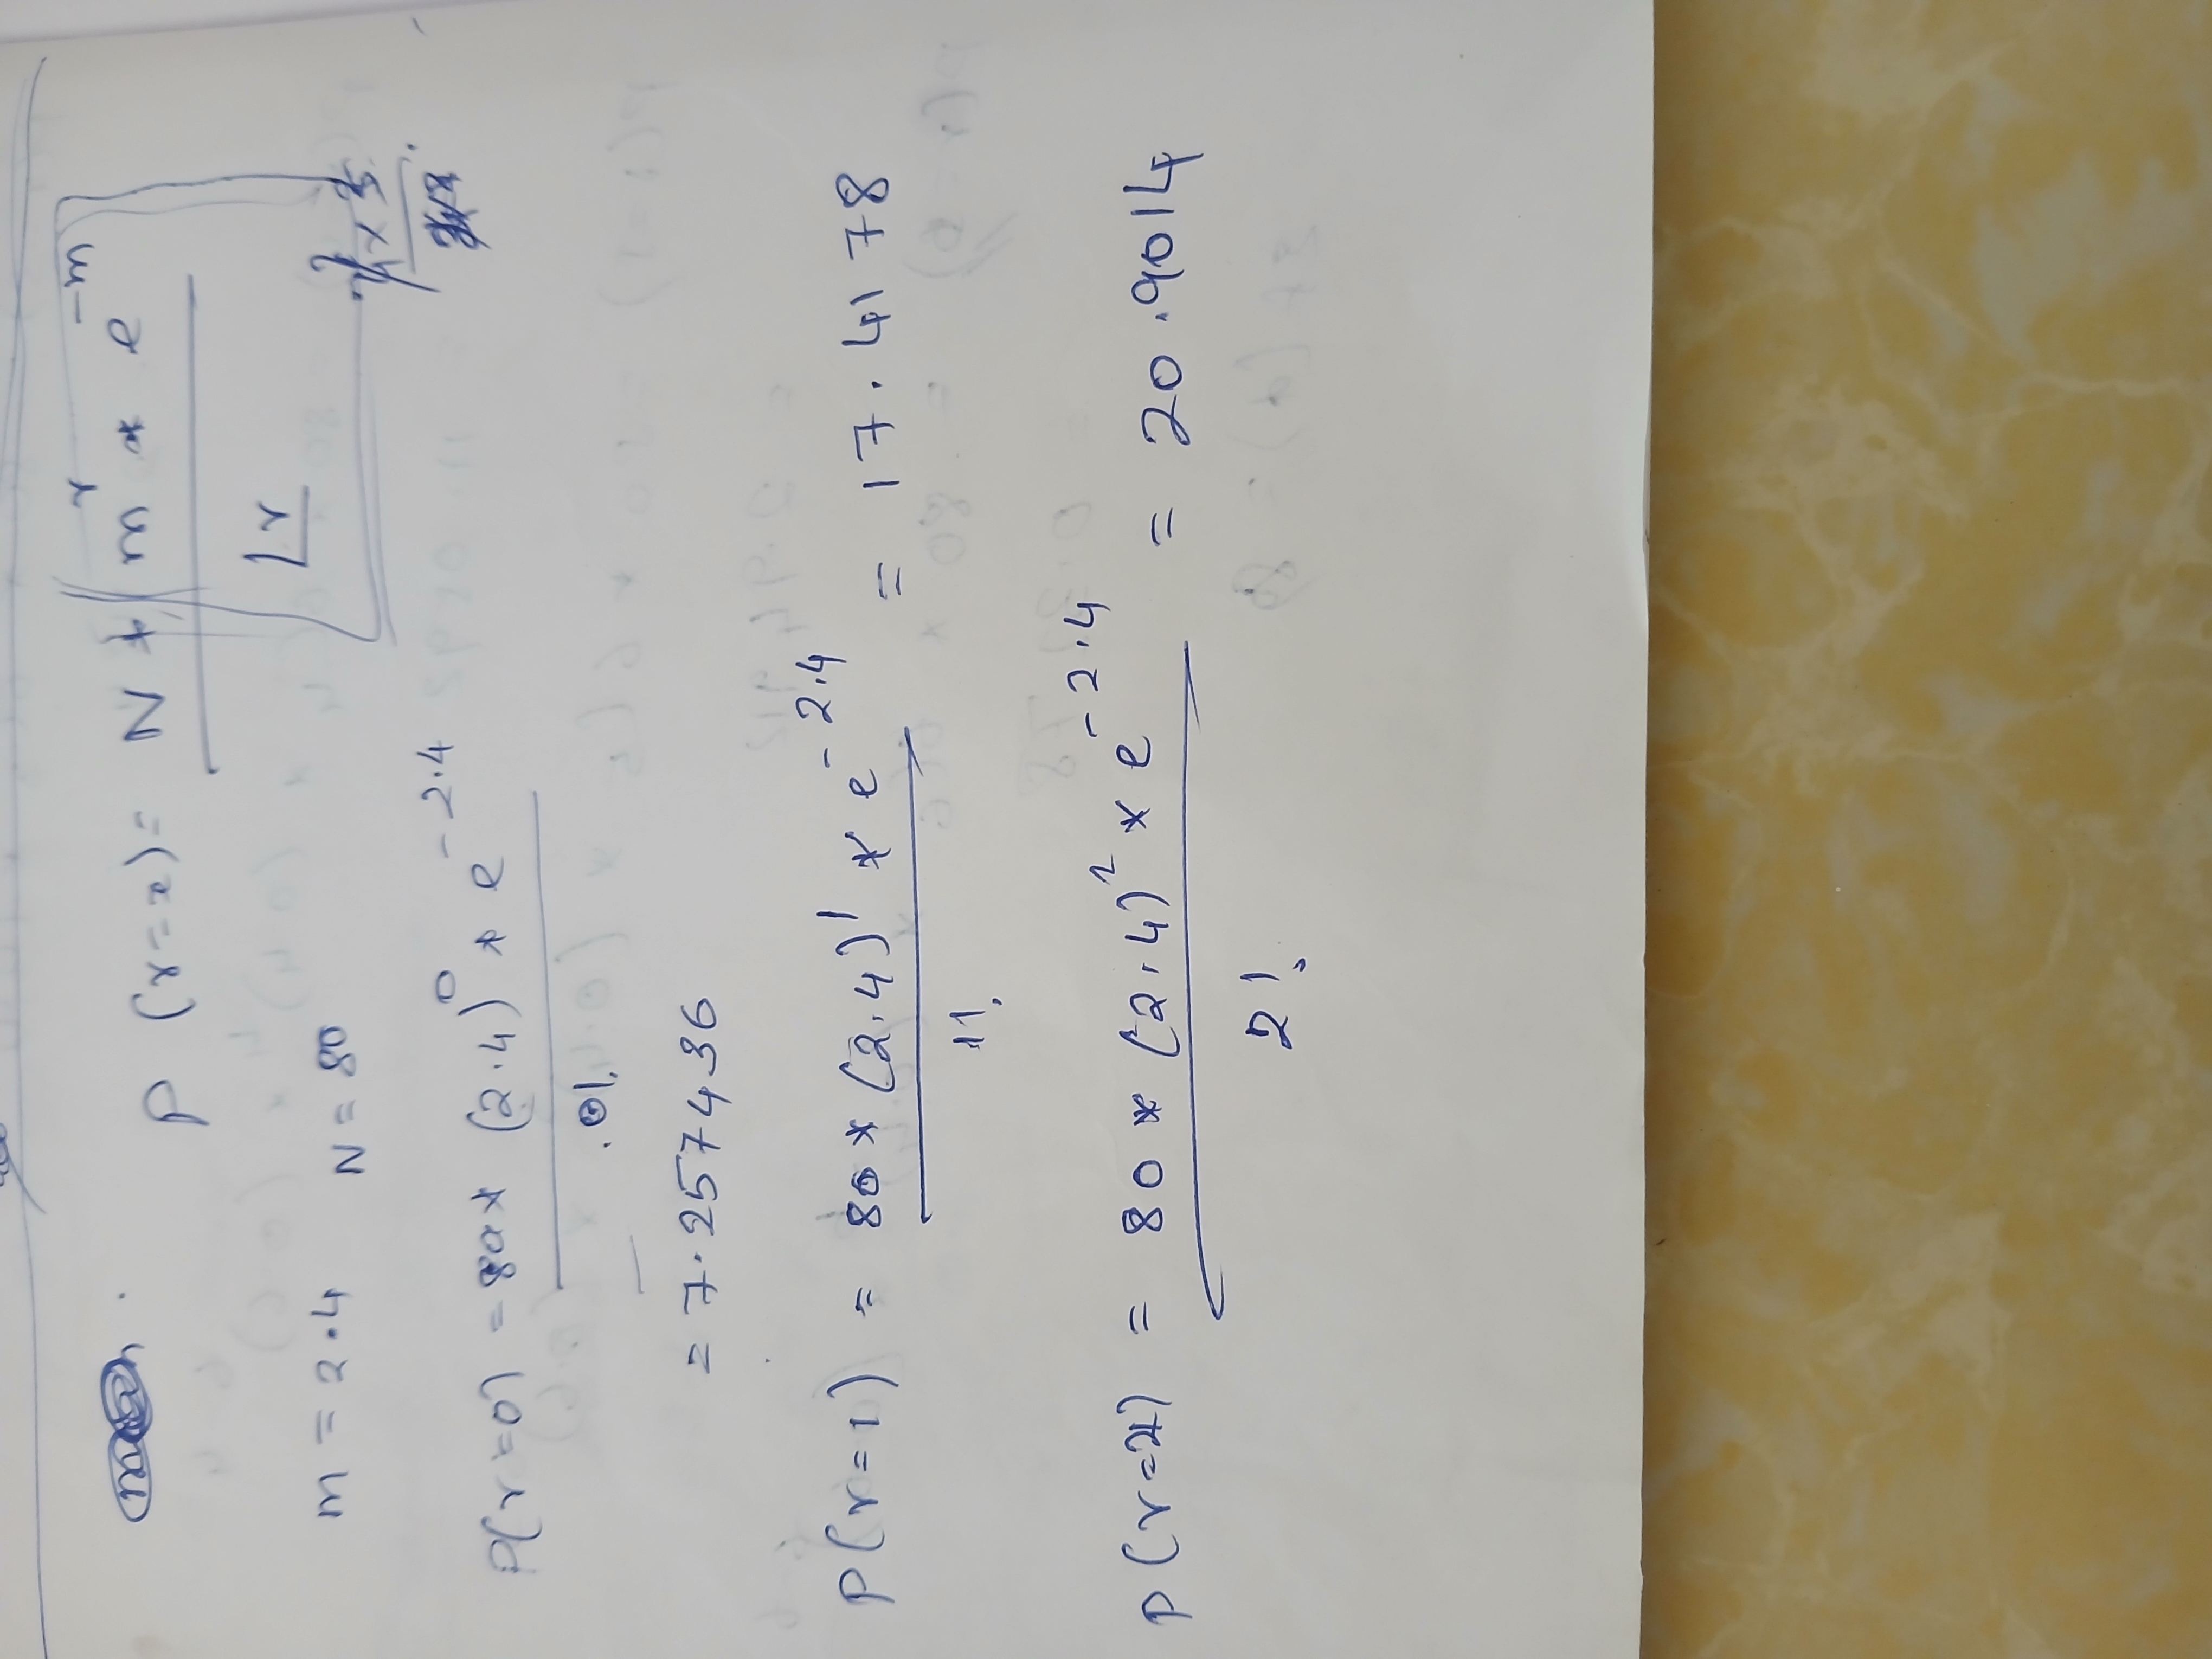